# Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
np.random.seed(1) # Fix random seed to be 1.
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation
from scipy.stats import uniform, randint # Utility function for parameter tuning
from sklearn.preprocessing import MinMaxScaler # Normalize features
from sklearn.feature_selection import chi2, mutual_info_classif # weight feature based on their predictive power
from sklearn.feature_selection import SelectKBest

# Modeling
from sklearn.tree import DecisionTreeClassifier # create a decision tree

# Evaluation method
from sklearn.model_selection import train_test_split # Holdout validation
from sklearn.model_selection import StratifiedKFold # Stratified K-fold cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Parameter tuning using cross validation

# Evaluation metric
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix # accuracy and confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report # precision, recall, and f1
from sklearn.metrics import plot_roc_curve, roc_auc_score # roc and auc


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

%precision 4

'%.4f'

In [2]:
pd.set_option('max_columns', None)

# Read in data

In [3]:
# Read the .csv file and store it as a pandas DataFrame
customer = pd.read_csv("customer_master.csv")

# Get the shape
print(customer.shape)

# Get the column types
print(customer.dtypes)

# View the data
customer.head()

(749859, 7)
CUSTOMER_NBR                      int64
STATE                            object
ZIP_CODE                         object
SHOPPER_SEGMENT_CODE            float64
EMAIL_HOLD_IND                   object
EMAIL_JANUARAY_ONLY_HOLD_IND     object
NEW_CUSTOMER_IND                 object
dtype: object


,CUSTOMER_NBR,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND
0,151386394,VA,23314,3.0,N,N,N
1,151672483,NC,28717,3.0,N,N,N
2,151548118,NY,10010,NaN,N,N,N
3,150138949,IN,46143,3.0,N,N,N
4,152280775,CT,06708,4.0,N,N,N


In [4]:
customer.describe()

,CUSTOMER_NBR,SHOPPER_SEGMENT_CODE
count,7.498590e+05,504285.000000
mean,1.519734e+08,2.902934
std,1.140996e+06,1.221121
min,1.500000e+08,1.000000
25%,1.509833e+08,2.000000
50%,1.519719e+08,3.000000
75%,1.529614e+08,4.000000
max,1.539492e+08,5.000000


In [5]:
# Read the .csv file and store it as a pandas DataFrame
order = pd.read_csv("order_master.csv")

# Get the shape
print(order.shape)

# Get the column types
print(order.dtypes)

# View the data
order.head()

(4725771, 8)
ORDER_NBR          object
ORDER_LINE_NBR      int64
CUSTOMER_NBR        int64
PRODUCT_NBR        object
ORDER_PLATFORM     object
ORDER_DATE         object
ORDER_TIME         object
TOTAL_LINE_AMT    float64
dtype: object


,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,20.99
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,177.74


In [6]:
order.describe()

,ORDER_LINE_NBR,CUSTOMER_NBR,TOTAL_LINE_AMT
count,4.725771e+06,4.725771e+06,4.725771e+06
mean,1.268537e+00,1.516390e+08,7.229641e+01
std,7.422682e-01,1.120232e+06,1.027045e+02
min,1.000000e+00,1.500000e+08,0.000000e+00
25%,1.000000e+00,1.506768e+08,3.453000e+01
50%,1.000000e+00,1.514723e+08,4.835000e+01
75%,1.000000e+00,1.524645e+08,7.186000e+01
max,2.400000e+01,1.539492e+08,7.719840e+03


In [7]:
# Read the .csv file and store it as a pandas DataFrame
airtime = pd.read_csv("product_airtime.csv")

# Get the shape
print(airtime.shape)

# Get the column types
print(airtime.dtypes)

# View the data
airtime.head()

(63468, 7)
PRODUCT_NBR         object
ONAIR_DATE          object
ONAIR_START_TMS     object
ONAIR_END_TMS       object
ONAIR_MINS         float64
HOST1               object
HOST2               object
dtype: object


,PRODUCT_NBR,ONAIR_DATE,ONAIR_START_TMS,ONAIR_END_TMS,ONAIR_MINS,HOST1,HOST2
0,P150028635,2015-01-02,2015-01-02 01:33:02,2015-01-02 01:58:20,25.32,NaN,NaN
1,P150028635,2015-01-02,2015-01-02 01:21:14,2015-01-02 01:32:48,11.58,NaN,NaN
2,P150028635,2015-01-01,2015-01-01 22:34:30,2015-01-01 22:58:17,23.80,NaN,NaN
3,P150028635,2015-01-01,2015-01-01 22:00:05,2015-01-01 22:33:02,32.97,NaN,NaN
4,P150028635,2015-01-01,2015-01-01 19:00:00,2015-01-01 19:00:01,0.03,NaN,NaN


In [8]:
airtime.describe()

,ONAIR_MINS
count,63468.000000
mean,3.794178
std,5.164771
min,0.020000
25%,0.480000
50%,1.100000
75%,6.220000
max,59.500000


In [9]:
# Read the .csv file and store it as a pandas DataFrame
product = pd.read_csv("product_master.csv")

# Get the shape
print(product.shape)

# Get the column types
print(product.dtypes)

# View the data
product.head()

(48780, 4)
PRODUCT_NBR            object
PRODUCT_DESCRIPTION    object
PRODUCT_CATEGORY       object
BRAND_NAME             object
dtype: object


,PRODUCT_NBR,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME
0,P150028635,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit
1,P150025286,SquareTrade 3-Yr Service Contract/Accidental,Fun & Leisure,SquareTrade
2,P150048858,Joan Rivers Crystal Pave' Orchid Brooch,Costume Jewelry,Joan Rivers
3,P150000250,Denim & Co. Original Waist Stretch Capri Pants,Apparel,Denim & Co.
4,P150018581,A-D philosophy no reason to hide duo,Health/Beauty,philosophy


In [10]:
product.describe()

,PRODUCT_NBR,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME
count,48780,48780,48780,45123
unique,48780,45420,19,1884
top,P150028635,SquareTrade 3-Yr Service Contract w/ADH: Electr,IQVC Divisional,Not Known
freq,1,20,14391,2710


# Convert to datetime object

In [11]:
order["ORDER_DATE"] = pd.to_datetime(order["ORDER_DATE"])

order["ORDER_YEAR"] = order.ORDER_DATE.apply(lambda x: x.year)
order["ORDER_MONTH"] = order.ORDER_DATE.apply(lambda x: x.month)
order["ORDER_DAY"] = order.ORDER_DATE.apply(lambda x: x.day)

order.head(3)

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT,ORDER_YEAR,ORDER_MONTH,ORDER_DAY
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28,2015,1,1
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28,2015,1,1
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28,2015,1,1


# Missing values

In [12]:
print(customer.isna().mean())
print(order.isna().mean())
print(product.isna().mean())
print(airtime.isna().mean())

CUSTOMER_NBR                    0.000000
STATE                           0.000009
ZIP_CODE                        0.000001
SHOPPER_SEGMENT_CODE            0.327494
EMAIL_HOLD_IND                  0.000000
EMAIL_JANUARAY_ONLY_HOLD_IND    0.000000
NEW_CUSTOMER_IND                0.000000
dtype: float64
ORDER_NBR         0.0
ORDER_LINE_NBR    0.0
CUSTOMER_NBR      0.0
PRODUCT_NBR       0.0
ORDER_PLATFORM    0.0
ORDER_DATE        0.0
ORDER_TIME        0.0
TOTAL_LINE_AMT    0.0
ORDER_YEAR        0.0
ORDER_MONTH       0.0
ORDER_DAY         0.0
dtype: float64
PRODUCT_NBR            0.000000
PRODUCT_DESCRIPTION    0.000000
PRODUCT_CATEGORY       0.000000
BRAND_NAME             0.074969
dtype: float64
PRODUCT_NBR        0.000000
ONAIR_DATE         0.000000
ONAIR_START_TMS    0.000000
ONAIR_END_TMS      0.000000
ONAIR_MINS         0.000000
HOST1              0.486024
HOST2              0.946036
dtype: float64


### Impute missing values for shopper segment code using mode (out of all columns that have missing values, only shopper segment code will be used in our model, so we will only impute shopper segment code for now)

In [13]:
customer["SHOPPER_SEGMENT_CODE"] = customer["SHOPPER_SEGMENT_CODE"].fillna(customer.SHOPPER_SEGMENT_CODE.mode().loc[0])

print(customer.isna().mean())

CUSTOMER_NBR                    0.000000
STATE                           0.000009
ZIP_CODE                        0.000001
SHOPPER_SEGMENT_CODE            0.000000
EMAIL_HOLD_IND                  0.000000
EMAIL_JANUARAY_ONLY_HOLD_IND    0.000000
NEW_CUSTOMER_IND                0.000000
dtype: float64


# Use string slicing to get order hour variable

In [14]:
order["ORDER_HOUR"] = order.ORDER_TIME.apply(lambda x: x[:2])
order["ORDER_HOUR"] = order["ORDER_HOUR"].astype(float)
order["ORDER_HOUR"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: ORDER_HOUR, dtype: float64

# Dummy Variables

### Category dummy variable

In [15]:
# find distinct product categories
prodcats = product.PRODUCT_CATEGORY
categories = np.sort(prodcats.unique())
print(categories)

['Accessories' 'App/Accss Event' 'Apparel' 'Collectibles'
 'Costume Jewelry' 'Electronics' 'Entertainment' 'Fun & Leisure'
 'Gift Cards' 'Health' 'Health/Beauty' 'Home Decor' 'Housewares'
 'IQVC Divisional' 'Jewelry' 'License Hardgds' 'PUBLIC RELATION' 'Returns'
 'Textile/Furnit']


In [16]:
prodcat_dummy = pd.get_dummies(product.PRODUCT_CATEGORY, prefix='CATEGORY', drop_first = True)
product = pd.concat([product,prodcat_dummy], axis = 1)

product = product.loc[:, ~product.columns.duplicated()] 

product.head()

,PRODUCT_NBR,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit
0,P150028635,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,P150025286,SquareTrade 3-Yr Service Contract/Accidental,Fun & Leisure,SquareTrade,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,P150048858,Joan Rivers Crystal Pave' Orchid Brooch,Costume Jewelry,Joan Rivers,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,P150000250,Denim & Co. Original Waist Stretch Capri Pants,Apparel,Denim & Co.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,P150018581,A-D philosophy no reason to hide duo,Health/Beauty,philosophy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [17]:
customer.head()

,CUSTOMER_NBR,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND
0,151386394,VA,23314,3.0,N,N,N
1,151672483,NC,28717,3.0,N,N,N
2,151548118,NY,10010,3.0,N,N,N
3,150138949,IN,46143,3.0,N,N,N
4,152280775,CT,06708,4.0,N,N,N


### Customer dummy variables

In [18]:
segment_dummy = pd.get_dummies(customer.SHOPPER_SEGMENT_CODE, prefix='SEGMENT', drop_first = True)
customer = pd.concat([customer,segment_dummy], axis = 1)

customer = customer.loc[:, ~customer.columns.duplicated()] 
customer = customer.drop("SEGMENT_5.0", axis=1)
customer.rename(columns={"SEGMENT_2.0": "SEGMENT_2"}, inplace=True)
customer.rename(columns={"SEGMENT_3.0": "SEGMENT_3"}, inplace=True)
customer.rename(columns={"SEGMENT_4.0": "SEGMENT_4"}, inplace=True)



customer.head()

,CUSTOMER_NBR,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND,SEGMENT_2,SEGMENT_3,SEGMENT_4
0,151386394,VA,23314,3.0,N,N,N,0,1,0
1,151672483,NC,28717,3.0,N,N,N,0,1,0
2,151548118,NY,10010,3.0,N,N,N,0,1,0
3,150138949,IN,46143,3.0,N,N,N,0,1,0
4,152280775,CT,06708,4.0,N,N,N,0,0,1


In [19]:
email_dummy = pd.get_dummies(customer.EMAIL_HOLD_IND, prefix='HOLD', drop_first = True)
customer = pd.concat([customer,email_dummy], axis = 1)

customer = customer.loc[:, ~customer.columns.duplicated()] 

customer.rename(columns={"HOLD_Y": "HOLD"}, inplace=True)

customer.head()

,CUSTOMER_NBR,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD
0,151386394,VA,23314,3.0,N,N,N,0,1,0,0
1,151672483,NC,28717,3.0,N,N,N,0,1,0,0
2,151548118,NY,10010,3.0,N,N,N,0,1,0,0
3,150138949,IN,46143,3.0,N,N,N,0,1,0,0
4,152280775,CT,06708,4.0,N,N,N,0,0,1,0


In [20]:
jan_dummy = pd.get_dummies(customer.EMAIL_JANUARAY_ONLY_HOLD_IND, prefix='JAN_HOLD', drop_first = True)
customer = pd.concat([customer,jan_dummy], axis = 1)

customer = customer.loc[:, ~customer.columns.duplicated()] 

customer.rename(columns={"JAN_HOLD_Y": "JAN_HOLD"}, inplace=True)

customer.head()

,CUSTOMER_NBR,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD
0,151386394,VA,23314,3.0,N,N,N,0,1,0,0,0
1,151672483,NC,28717,3.0,N,N,N,0,1,0,0,0
2,151548118,NY,10010,3.0,N,N,N,0,1,0,0,0
3,150138949,IN,46143,3.0,N,N,N,0,1,0,0,0
4,152280775,CT,06708,4.0,N,N,N,0,0,1,0,0


In [21]:
new_dummy = pd.get_dummies(customer.NEW_CUSTOMER_IND, prefix='NEW_CUST', drop_first = True)
customer = pd.concat([customer,new_dummy], axis = 1)

customer = customer.loc[:, ~customer.columns.duplicated()] 

customer.rename(columns={"NEW_CUST_Y": "NEW_CUST"}, inplace=True)

customer.head()

,CUSTOMER_NBR,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST
0,151386394,VA,23314,3.0,N,N,N,0,1,0,0,0,0
1,151672483,NC,28717,3.0,N,N,N,0,1,0,0,0,0
2,151548118,NY,10010,3.0,N,N,N,0,1,0,0,0,0
3,150138949,IN,46143,3.0,N,N,N,0,1,0,0,0,0
4,152280775,CT,06708,4.0,N,N,N,0,0,1,0,0,0


### Order platform dummy variable

In [22]:
platform_dummy = pd.get_dummies(order.ORDER_PLATFORM, prefix='PLATFORM', drop_first = True)
order = pd.concat([order,platform_dummy], axis = 1)

order = order.loc[:, ~order.columns.duplicated()] 

order.head()

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT,ORDER_YEAR,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28,2015,1,1,0.0,0,0,0,1,0
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28,2015,1,1,0.0,0,0,0,1,0
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28,2015,1,1,0.0,0,0,0,0,0
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,20.99,2015,1,1,0.0,0,0,0,0,0
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,177.74,2015,1,1,1.0,0,0,0,1,0


# Aggregate on customer level and merge tables to get one final table

### Concatenate aggregated customer tables

In [23]:
cust_aggr1 = order[["CUSTOMER_NBR", "PLATFORM_On Air - 2nd Channel", "PLATFORM_QVC INSIDER MAGAZINE", "PLATFORM_QVC Voices", "PLATFORM_QVC.COM", "PLATFORM_Streaming video", "ORDER_MONTH", "ORDER_DAY", "ORDER_HOUR"]].groupby('CUSTOMER_NBR').mean().reset_index()

cust_aggr2 = order[["CUSTOMER_NBR", "TOTAL_LINE_AMT"]].groupby("CUSTOMER_NBR").mean().reset_index()

cust_aggr = pd.concat([cust_aggr1,cust_aggr2], axis = 1)

cust_aggr.head()

,CUSTOMER_NBR,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,CUSTOMER_NBR,TOTAL_LINE_AMT
0,150000001,0.0,0.0,0.0,0.000000,0.0,2.000000,17.250000,12.500000,150000001,34.220000
1,150000011,0.0,0.0,0.0,0.000000,0.0,1.000000,19.000000,6.000000,150000011,43.150000
2,150000012,0.0,0.0,0.0,0.794118,0.0,1.970588,18.205882,13.911765,150000012,71.177647
3,150000014,0.0,0.0,0.0,1.000000,0.0,2.000000,27.000000,10.000000,150000014,126.140000
4,150000016,0.0,0.0,0.0,1.000000,0.0,1.461538,11.230769,14.538462,150000016,52.900769


### Drop duplicated customer id column

In [24]:
cust_aggr = cust_aggr.loc[:, ~cust_aggr.columns.duplicated()]

### Merge aggregated customer table to retain dummy variables

In [25]:
cust_aggr = cust_aggr.merge(customer, on='CUSTOMER_NBR', how = 'inner')
print(cust_aggr.shape)
cust_aggr.head()

(749859, 22)


,CUSTOMER_NBR,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,TOTAL_LINE_AMT,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST
0,150000001,0.0,0.0,0.0,0.000000,0.0,2.000000,17.250000,12.500000,34.220000,GA,30305,3.0,N,N,N,0,1,0,0,0,0
1,150000011,0.0,0.0,0.0,0.000000,0.0,1.000000,19.000000,6.000000,43.150000,MO,63133,4.0,N,N,N,0,0,1,0,0,0
2,150000012,0.0,0.0,0.0,0.794118,0.0,1.970588,18.205882,13.911765,71.177647,IN,46807,3.0,N,N,N,0,1,0,0,0,0
3,150000014,0.0,0.0,0.0,1.000000,0.0,2.000000,27.000000,10.000000,126.140000,MI,48235,3.0,N,N,Y,0,1,0,0,0,1
4,150000016,0.0,0.0,0.0,1.000000,0.0,1.461538,11.230769,14.538462,52.900769,IL,60178,3.0,N,N,N,0,1,0,0,0,0


### Join product and order table on product id

In [26]:
order_merge = order.merge(product, on='PRODUCT_NBR', how = 'inner')
print(order_merge.shape)
order_merge.head()

(4725769, 38)


,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT,ORDER_YEAR,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,PRODUCT_DESCRIPTION,PRODUCT_CATEGORY,BRAND_NAME,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28,2015,1,1,0.0,0,0,0,1,0,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28,2015,1,1,0.0,0,0,0,1,0,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28,2015,1,1,0.0,0,0,0,0,0,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,O150028997,1,152039090,P150028635,QVC.COM,2015-01-01,03:41:54,202.56,2015,1,1,3.0,0,0,0,1,0,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,O150033355,1,150850369,P150028635,QVC.COM,2015-01-01,08:16:57,103.28,2015,1,1,8.0,0,0,0,1,0,Fitbit Flex Wireless Activity and Sleep Tracker,Fun & Leisure,Fitbit,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
print(product.columns)

Index(['PRODUCT_NBR', 'PRODUCT_DESCRIPTION', 'PRODUCT_CATEGORY', 'BRAND_NAME',
       'CATEGORY_App/Accss Event', 'CATEGORY_Apparel', 'CATEGORY_Collectibles',
       'CATEGORY_Costume Jewelry', 'CATEGORY_Electronics',
       'CATEGORY_Entertainment', 'CATEGORY_Fun & Leisure',
       'CATEGORY_Gift Cards', 'CATEGORY_Health', 'CATEGORY_Health/Beauty',
       'CATEGORY_Home Decor', 'CATEGORY_Housewares',
       'CATEGORY_IQVC Divisional', 'CATEGORY_Jewelry',
       'CATEGORY_License Hardgds', 'CATEGORY_PUBLIC RELATION',
       'CATEGORY_Returns', 'CATEGORY_Textile/Furnit'],
      dtype='object')


### Aggregate merged order table on customer id

In [28]:
order_merge_aggr = order_merge[['CUSTOMER_NBR',
       'CATEGORY_App/Accss Event', 'CATEGORY_Apparel', 'CATEGORY_Collectibles',
       'CATEGORY_Costume Jewelry', 'CATEGORY_Electronics',
       'CATEGORY_Entertainment', 'CATEGORY_Fun & Leisure',
       'CATEGORY_Gift Cards', 'CATEGORY_Health', 'CATEGORY_Health/Beauty',
       'CATEGORY_Home Decor', 'CATEGORY_Housewares',
       'CATEGORY_IQVC Divisional', 'CATEGORY_Jewelry',
       'CATEGORY_License Hardgds', 'CATEGORY_PUBLIC RELATION',
       'CATEGORY_Returns', 'CATEGORY_Textile/Furnit']].groupby("CUSTOMER_NBR").mean().reset_index()

order_merge_aggr.head()

,CUSTOMER_NBR,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit
0,150000001,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,150000011,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,150000012,0.0,0.264706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147059,0.264706,0.0,0.029412,0.088235,0.0,0.0,0.0,0.0
3,150000014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
4,150000016,0.0,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


# Merge for final table

In [29]:
cust_aggr = cust_aggr.merge(order_merge_aggr, on='CUSTOMER_NBR', how = 'inner')
print(cust_aggr.shape)
cust_aggr.head()

(749859, 40)


,CUSTOMER_NBR,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,TOTAL_LINE_AMT,STATE,ZIP_CODE,SHOPPER_SEGMENT_CODE,EMAIL_HOLD_IND,EMAIL_JANUARAY_ONLY_HOLD_IND,NEW_CUSTOMER_IND,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit
0,150000001,0.0,0.0,0.0,0.000000,0.0,2.000000,17.250000,12.500000,34.220000,GA,30305,3.0,N,N,N,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,150000011,0.0,0.0,0.0,0.000000,0.0,1.000000,19.000000,6.000000,43.150000,MO,63133,4.0,N,N,N,0,0,1,0,0,0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,150000012,0.0,0.0,0.0,0.794118,0.0,1.970588,18.205882,13.911765,71.177647,IN,46807,3.0,N,N,N,0,1,0,0,0,0,0.0,0.264706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147059,0.264706,0.0,0.029412,0.088235,0.0,0.0,0.0,0.0
3,150000014,0.0,0.0,0.0,1.000000,0.0,2.000000,27.000000,10.000000,126.140000,MI,48235,3.0,N,N,Y,0,1,0,0,0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
4,150000016,0.0,0.0,0.0,1.000000,0.0,1.461538,11.230769,14.538462,52.900769,IL,60178,3.0,N,N,N,0,1,0,0,0,0,0.0,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


# Drop middle 50% of customers and outliers

To further eliminate noise that could negatively impact our model’s predictive power, we dropped the middle 50% of our spending data, as the middle amounts detracted from a true understanding of high versus low spend.

Text(0.5, 1.0, 'Box plot of average purchase amount per customer')

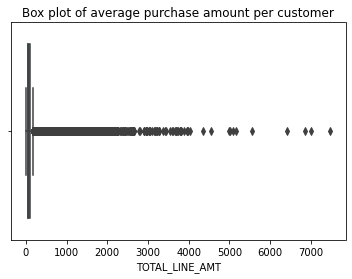

In [30]:
sns.boxplot(x = cust_aggr.TOTAL_LINE_AMT.dropna()).set_title("Box plot of average purchase amount per customer")

In [31]:
cspend = order[['CUSTOMER_NBR', "TOTAL_LINE_AMT"]].groupby("CUSTOMER_NBR").sum()
cspend.head()
print(len(cspend))

749859


### 749,859 customers make up 4,725,771 transactions

In [32]:
top_buyers = order.groupby('CUSTOMER_NBR')['ORDER_NBR'].nunique().sort_values(ascending = False)
top_buyers.head(20000)

CUSTOMER_NBR
153008121    434
153187841    415
152121298    394
152586206    384
152113946    375
            ... 
151554844     29
150802189     29
151306087     29
151820436     29
153803209     29
Name: ORDER_NBR, Length: 20000, dtype: int64

### Top 20,000 customers are ordering 29 orders or more

In [33]:
# Drop unused columns in order to drop outliers
cust_aggr = cust_aggr.drop(['CUSTOMER_NBR', 'STATE', 'ZIP_CODE', 'EMAIL_HOLD_IND', 'EMAIL_JANUARAY_ONLY_HOLD_IND', 'NEW_CUSTOMER_IND', 'SHOPPER_SEGMENT_CODE'], axis=1)

In [34]:
# Drop outliers above and below 3rd standard deviation
from scipy import stats
cust_aggr = cust_aggr[(np.abs(stats.zscore(cust_aggr))<3).all(axis=1)]


In [35]:
# Drop middle 50% percent

q1 = cust_aggr.TOTAL_LINE_AMT.quantile(.25)
q3 = cust_aggr.TOTAL_LINE_AMT.quantile(.75)

print(q1)
print(q3)

cust_aggr = cust_aggr.loc[(cust_aggr.TOTAL_LINE_AMT <= q1) | (cust_aggr.TOTAL_LINE_AMT >=q3), :]

44.68333333333334
83.45


Text(0.5, 1.0, 'Box plot of average purchase amount per customer')

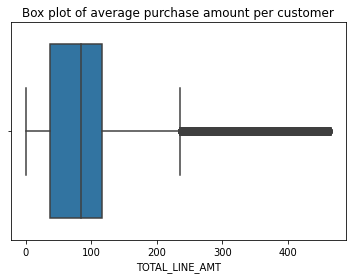

In [36]:
# Box plot now looks much different without middle 50% and outliers
sns.boxplot(x = cust_aggr.TOTAL_LINE_AMT.dropna()).set_title("Box plot of average purchase amount per customer")

# Create target variable column before converting final table to csv
### Target variable column will be made my giving a customer a "high" label if above q3 and a "low" label if below q1

In [37]:
def label_customer(row):
    if row['TOTAL_LINE_AMT'] >= q3:
        return "high" 
    elif row['TOTAL_LINE_AMT'] <= q1:
        return "low"

cust_aggr['spender'] = cust_aggr.apply (lambda row: label_customer(row), axis=1)

cust_aggr = cust_aggr.loc[:, ~cust_aggr.columns.duplicated()] 

In [38]:
# Drop line amt as we now have class label
cust_aggr = cust_aggr.drop(['TOTAL_LINE_AMT'], axis=1)
cust_aggr.head()

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit,spender
0,0.0,0.0,0.0,0.0,0.0,2.000000,17.250000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,low
7,0.0,0.0,0.0,0.0,0.0,2.166667,16.000000,10.833333,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,high
9,0.0,0.0,0.0,0.0,0.0,2.000000,16.000000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,low
18,0.0,0.0,0.0,1.0,0.0,2.000000,13.000000,22.000000,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,low
20,0.0,0.0,0.0,0.0,0.0,1.666667,14.666667,14.555556,0,0,1,0,0,0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.0,0.0,low


# Final table to CSV

In [39]:
cust_aggr.to_csv('customer_cleaned_merged.csv', index = False)
data = pd.read_csv('customer_cleaned_merged.csv')

In [40]:
data.head()

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit,spender
0,0.0,0.0,0.0,0.0,0.0,2.000000,17.250000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,low
1,0.0,0.0,0.0,0.0,0.0,2.166667,16.000000,10.833333,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,high
2,0.0,0.0,0.0,0.0,0.0,2.000000,16.000000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,low
3,0.0,0.0,0.0,1.0,0.0,2.000000,13.000000,22.000000,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,low
4,0.0,0.0,0.0,0.0,0.0,1.666667,14.666667,14.555556,0,0,1,0,0,0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.0,0.0,low
